In [1]:
# I am going to re-analyze the data that made Dr. Semmelweis discover the importance of handwashing.

In [8]:
# import modules 
import pandas as pd 

# read yearly dataset 
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')

# print sample 
yearly.head(5)

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [12]:
# Find the proportion of deaths out of the number of women giving birth

# calculate propotion of deaths per no. births 
yearly['proportion_deaths'] = (yearly.deaths / yearly.births)

# extract clinic 1 data and clinic 2 data 
clinic1 = yearly[yearly.clinic == 'clinic 1']
clinic2 = yearly[yearly.clinic == 'clinic 2']

# print sample of clinic1 data
print(clinic1.head(5))

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015


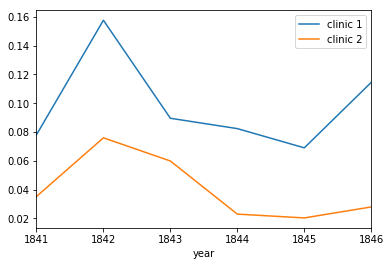

In [13]:
# plot the proportions 
%matplotlib inline

# plot yearly proportion of deaths at the two clinics
ax = clinic1.plot(x='year', y='proportion_deaths', label='clinic 1')
clinic2.plot(x='year', y='proportion_deaths', label='clinic 2', ax=ax)

In [14]:
## wash your hands!!!! 

# read monthly deaths after washing hands 
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates=['date'])

# calculate the proportion of deaths per no of births 
monthly['proportion_deaths'] = (monthly.deaths / monthly.births)

# print sample of monthly 
print(monthly.head(5))

                 date  births  deaths  proportion_deaths
0 1841-01-01 00:00:00     254      37           0.145669
1 1841-02-01 00:00:00     239      18           0.075314
2 1841-03-01 00:00:00     277      12           0.043321
3 1841-04-01 00:00:00     255       4           0.015686
4 1841-05-01 00:00:00     255       2           0.007843


Text(0,0.5,'proportion of deaths')

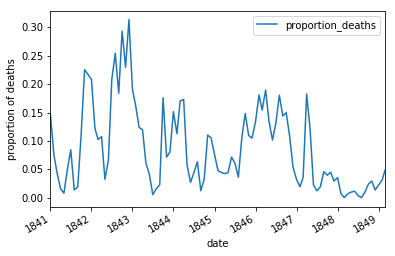

In [15]:
%matplotlib inline 
ax = monthly.plot(x='date', y='proportion_deaths')
ax.set_ylabel('proportion of deaths')

Text(0,0.5,'proportion of deaths')

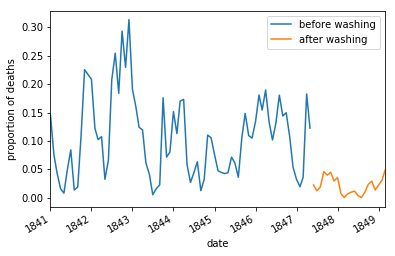

In [17]:
# The effect of handwashing 
handwashing_start  = pd.to_datetime('1847-06-01')

# split the monthly data into before and after handwashing started
before_washing = monthly[monthly['date'] < handwashing_start]
after_washing  = monthly[monthly['date'] >= handwashing_start]

# plot monthly proportion of deaths before and after handwashing 
ax = before_washing.plot(x='date', y='proportion_deaths', label='before washing')
after_washing.plot(x='date', y='proportion_deaths', label='after washing', ax=ax)
ax.set_ylabel('proportion of deaths')

In [18]:
# difference in mean monthly proportion of deaths dure to handwashing 
before_proportion = before_washing.proportion_deaths
after_proportion  = after_washing.proportion_deaths
mean_diff = (after_proportion.mean() - before_proportion.mean())

# print the mean diff 
print(mean_diff)

-0.08395660751183336


In [20]:
# a boostrap analysis of the reduction of deaths due to handwashing 
boot_mean_diff = []

for i in range(1000): 
    boot_before = before_proportion.sample(frac=1 , replace=True)
    boot_after  = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())
    
# calculate a 95% confidence interval from the boot mean diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])

# print confidence interval 
print(confidence_interval * 100)

0.025   -10.228794
0.975    -6.614029
dtype: float64


In [23]:
#final statement 
print("According to this data, washing hands reduced death proportions by 6.7 to 10 % with a 95% confidence")

According to this data, washing hands reduced death proportions by 6.7 to 10 % with a 95% confidence
